In [149]:
import pandas as pd 
import datetime as dt
import numpy as np

import requests
import json
from pprint import pprint
import csv

In [2]:
df =  pd.read_csv('features.csv')

/home/brownapple/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (1,4,7,10,13,16,19,22,25,28,34,37,40,43,46,49,55,58,61,64,67,70,73,76,79,82,85,88,91,94,97,100,103,106,112,115,118,121,124,127,130,133,136,139,142,145,148,151,154,157,160,163,166,169,172,175,178,181,184,187,190,193,196,199,202,205,208,211,217,220,223,226,232,235,238,241,244,247,250,253,256,259,265,268,271,274,277,280,283,286,289,292,295,298,301,304,307,310,313,316,319,322,325,328,331,334,337,340,343,346,349,352,355,358,361,364,367,370,373,376,379,382,385,388,391,394,397,403,406,409,412,415,418,421,424,427,430,433,436,439,442,445,448,451,454,457,460,463,466,469,472,475,478,481,484,487,490,493,496) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,Unnamed: 0,CME_QXD,CME_QXS,CME_QXV,LIFFE_RD,LIFFE_RS,LIFFE_RV,SHFE_RBD,SHFE_RBS,SHFE_RBV,...,CME_MEV,CME_MEOD,CME_MEOS,CME_MEOV,CME_MFD,CME_MFS,CME_MFV,CME_MFFD,CME_MFFS,CME_MFFV
0,0,2018-11-27,77.68,0.0,2019-05-01,127.61,88149.0,2019-04-30,4192.0,143910.0,...,0.0,2019-05-01,684.125,0.0,2019-05-01,66.05,0.0,2019-05-01,71.60,0.0
1,1,2018-11-26,77.68,0.0,2019-04-30,127.32,214495.0,2019-04-29,4179.0,86764.0,...,0.0,2019-04-30,684.125,0.0,2019-04-30,66.04,0.0,2019-04-30,68.58,0.0
2,2,2018-11-23,77.55,0.0,2019-04-29,127.67,111667.0,2019-04-26,4145.0,78638.0,...,0.0,2019-04-29,683.631,0.0,2019-04-29,66.04,0.0,2019-04-29,68.58,0.0
3,3,2018-11-21,77.55,0.0,2019-04-26,127.75,133857.0,2019-04-25,4143.0,96228.0,...,0.0,2019-04-26,684.079,0.0,2019-04-26,66.01,0.0,2019-04-26,68.60,0.0
4,4,2018-11-20,77.55,0.0,2019-04-25,127.62,126012.0,2019-04-24,4135.0,130212.0,...,0.0,2019-04-25,684.730,0.0,2019-04-24,66.29,0.0,2019-04-25,69.25,0.0


In [4]:
sample_df = df[["SHFE_RBD","SHFE_RBS"]]
sample_df.head()

,SHFE_RBD,SHFE_RBS
0,2019-04-30,4192.0
1,2019-04-29,4179.0
2,2019-04-26,4145.0
3,2019-04-25,4143.0
4,2019-04-24,4135.0


In [14]:
sample_df = sample_df.set_index('SHFE_RBD')

In [150]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
import matplotlib.pyplot as plt

In [2]:
engine = create_engine("sqlite:///trade.sqlite")

NameError: name 'create_engine' is not defined

In [34]:
Base = automap_base()

In [35]:
Base.prepare(engine, reflect=True)

In [36]:
Base.classes.keys()

['exports', 'imports']

In [37]:
export = Base.classes.exports

In [38]:
session = Session(engine)

In [5]:
# newList = []
# for row in session.query(export.Period).all():
#     print(row)

In [6]:
# newList = []
# for row in session.query(export.Period).all():
#     newList.append(row.__dict__)

In [151]:
api_key = "93ba5366cb39b249dcbde95cc4d461e7b05b747d"
export_url = (f"https://api.census.gov/data/timeseries/intltrade/exports")
import_url = (f"https://api.census.gov/data/timeseries/intltrade/imports")
china_code = "5700"
usa_code = "1000"
month = []
year = []

In [152]:
export_by_commodity = requests.get(f"{export_url}/hs?get=E_COMMODITY,E_COMMODITY_SDESC,ALL_VAL_MO,ALL_VAL_YR&time=from+2015-01&COMM_LVL=HS4").json()


In [153]:
len(export_by_commodity)

62429

In [154]:
count = 1
movalue = []
yrvalue = []
period = []
desc = []
code = []
while count < 62428:
    count += 1
    movalue.append(export_by_commodity[count][2])
    yrvalue.append(export_by_commodity[count][3])
    desc.append(export_by_commodity[count][1])
    period.append(export_by_commodity[count][4])
    code.append(export_by_commodity[count][0])
Export = pd.DataFrame({"YTD Value" : yrvalue,
                           "Monthly Value" : movalue,
                          "Period" : period,
                          "Commodity" : desc,
                          "Comm Code": code})

In [155]:
Export.head()

,YTD Value,Monthly Value,Period,Commodity,Comm Code
0,90799112,14887404,2017-06,"WOV FABRIC, SYNTH STAPLE FIB NU 85% SYNTH ST F...",5512
1,223724843,28777799,2018-11,"ONIONS, SHALLOTS, GARLIC, LEEKS ETC, FR OR CHI...",0703
2,104455523,14388026,2015-06,"WOV FABRIC, SYNTH STAPLE FIB NU 85% SYNTH ST F...",5512
3,63994027,27820067,2019-02,"ONIONS, SHALLOTS, GARLIC, LEEKS ETC, FR OR CHI...",0703
4,166874656,22059080,2018-09,"ONIONS, SHALLOTS, GARLIC, LEEKS ETC, FR OR CHI...",0703


In [293]:
df_2015 = Export[Export["Comm Code"].str.contains("2709")]

In [294]:
df_2015.head()

,YTD Value,Monthly Value,Period,Commodity,Comm Code
23690,2562276423,2562276423,2018-01-01,CRUDE OIL FROM PETROLEUM AND BITUMINOUS MINERALS,2709
23693,9169490982,4830376979,2019-02-01,CRUDE OIL FROM PETROLEUM AND BITUMINOUS MINERALS,2709
23694,42659658525,5006712609,2018-11-01,CRUDE OIL FROM PETROLEUM AND BITUMINOUS MINERALS,2709
56780,2449768671,746589663,2016-04-01,CRUDE OIL FROM PETROLEUM AND BITUMINOUS MINERALS,2709
56782,8238590229,472169266,2015-11-01,CRUDE OIL FROM PETROLEUM AND BITUMINOUS MINERALS,2709


In [295]:
Export["YTD Value"] =pd.to_numeric(Export["YTD Value"])
Export["Monthly Value"] =pd.to_numeric(Export["Monthly Value"])
Export["Period"]=pd.to_datetime(Export.Period)

In [296]:
df_2015["YTD Value"] =pd.to_numeric(df_2015["YTD Value"])
df_2015["Monthly Value"] =pd.to_numeric(df_2015["Monthly Value"])

C:\Users\Bashira\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Bashira\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [297]:
df_2015["Monthly Value"].sum()

102159562540

In [298]:
df_2015.head()

,YTD Value,Monthly Value,Period,Commodity,Comm Code
23690,2562276423,2562276423,2018-01-01,CRUDE OIL FROM PETROLEUM AND BITUMINOUS MINERALS,2709
23693,9169490982,4830376979,2019-02-01,CRUDE OIL FROM PETROLEUM AND BITUMINOUS MINERALS,2709
23694,42659658525,5006712609,2018-11-01,CRUDE OIL FROM PETROLEUM AND BITUMINOUS MINERALS,2709
56780,2449768671,746589663,2016-04-01,CRUDE OIL FROM PETROLEUM AND BITUMINOUS MINERALS,2709
56782,8238590229,472169266,2015-11-01,CRUDE OIL FROM PETROLEUM AND BITUMINOUS MINERALS,2709


In [162]:
def commodity(trade,code):
    data = trade[trade["Comm Code"].str.contains(code)]
    data = data.sort_values(by='Period', ascending=True)
    data = data.reset_index()
    
    return data

In [231]:
rice = commodity(Export,"1006")

In [232]:
rice.head()

,index,YTD Value,Monthly Value,Period,Commodity,Comm Code
0,49783,177701931,177701931,2015-01-01,RICE,1006
1,49788,301770716,124068785,2015-02-01,RICE,1006
2,4765,473299026,171528310,2015-03-01,RICE,1006
3,49834,635716212,162417186,2015-04-01,RICE,1006
4,49795,836757931,201041719,2015-05-01,RICE,1006


In [233]:
trade = rice[["Period", "Monthly Value"]]
trade = trade.set_index('Period')
trade.head()

,Monthly Value
Period,
2015-01-01,177701931
2015-02-01,124068785
2015-03-01,171528310
2015-04-01,162417186
2015-05-01,201041719


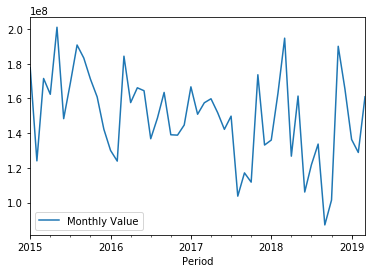

In [234]:
trade.plot()

In [169]:
trade.describe()

,Monthly Value
count,5.100000e+01
mean,6.439993e+09
std,1.135977e+09
min,4.036153e+09
25%,5.608726e+09
50%,6.278796e+09
75%,7.318509e+09
max,9.015393e+09


In [39]:
# fbProphet Model 
?conda install pystan -c conda-forge
?conda install -c conda-forge fbprophet

Object `conda install pystan -c conda-forge` not found.
Object `conda install -c conda-forge fbprophet` not found.


In [388]:
rice = commodity(Export,"2710")
rice.head()

,index,YTD Value,Monthly Value,Period,Commodity,Comm Code
0,34288,6654682411,6654682411,2015-01-01,OIL (NOT CRUDE) FROM PETR,2710
1,34248,12385168081,5730485670,2015-02-01,OIL (NOT CRUDE) FROM PETR,2710
2,34273,17952498009,5567329928,2015-03-01,OIL (NOT CRUDE) FROM PETR,2710
3,34284,24451111839,6498613830,2015-04-01,OIL (NOT CRUDE) FROM PETR,2710
4,34263,31588124399,7137012560,2015-05-01,OIL (NOT CRUDE) FROM PETR,2710


In [389]:
trade = rice[["Period", "Monthly Value"]]
trade = trade.set_index('Period')
trade.head()

,Monthly Value
Period,
2015-01-01,6654682411
2015-02-01,5730485670
2015-03-01,5567329928
2015-04-01,6498613830
2015-05-01,7137012560


In [390]:
import fbprophet

In [391]:
trade = trade.reset_index()


In [392]:
trade.head()

,Period,Monthly Value
0,2015-01-01,6654682411
1,2015-02-01,5730485670
2,2015-03-01,5567329928
3,2015-04-01,6498613830
4,2015-05-01,7137012560


In [393]:
type(trade.Period)

pandas.core.series.Series

In [394]:
trade_test = trade.rename(columns={'Period': 'ds', 'Monthly Value': 'y'})

In [395]:
trade_test.y = trade_test.y/1000000000


In [396]:
trade_test.head()

,ds,y
0,2015-01-01,6.654682
1,2015-02-01,5.730486
2,2015-03-01,5.567330
3,2015-04-01,6.498614
4,2015-05-01,7.137013


In [397]:
trade_prophet = fbprophet.Prophet(changepoint_prior_scale=0.15)
trade_prophet.fit(trade_test)

C:\Users\Bashira\Anaconda3\lib\site-packages\fbprophet\forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Bashira\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [398]:
trade_forecast = trade_prophet.make_future_dataframe(periods=12, freq='M')

In [399]:
trade_forecast = trade_prophet.predict(trade_forecast)

In [400]:
trade_forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01,6.695937,5.982645,6.872325,6.695937,6.695937,-0.269216,-0.269216,-0.269216,-0.269216,-0.269216,-0.269216,0.0,0.0,0.0,6.426721
1,2015-02-01,6.566331,5.201114,6.096805,6.566331,6.566331,-0.927073,-0.927073,-0.927073,-0.927073,-0.927073,-0.927073,0.0,0.0,0.0,5.639258
2,2015-03-01,6.449268,5.572440,6.441752,6.449268,6.449268,-0.429103,-0.429103,-0.429103,-0.429103,-0.429103,-0.429103,0.0,0.0,0.0,6.020165
3,2015-04-01,6.319662,6.386201,7.280862,6.319662,6.319662,0.508963,0.508963,0.508963,0.508963,0.508963,0.508963,0.0,0.0,0.0,6.828625
4,2015-05-01,6.194237,6.274816,7.138786,6.194237,6.194237,0.524224,0.524224,0.524224,0.524224,0.524224,0.524224,0.0,0.0,0.0,6.718462


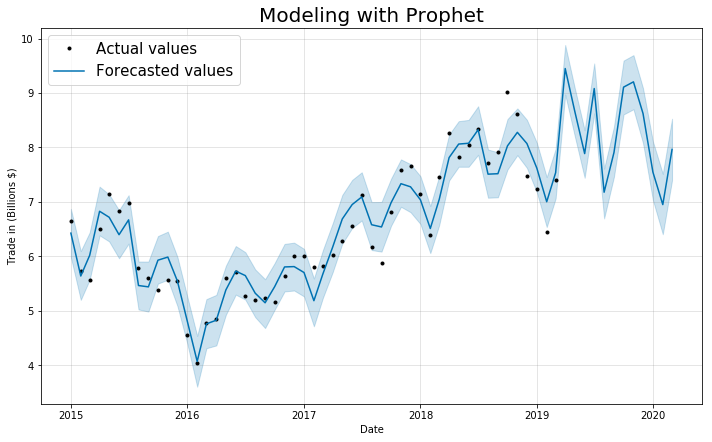

In [401]:
trade_prophet.plot(trade_forecast, xlabel = 'Date', ylabel = 'Trade in (Billions $)')
plt.title('Modeling with Prophet',fontsize=20);
plt.gca().legend(("Actual values", "Forecasted values"),fontsize=15)

In [402]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [403]:
trade_forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01,6.695937,5.982645,6.872325,6.695937,6.695937,-0.269216,-0.269216,-0.269216,-0.269216,-0.269216,-0.269216,0.0,0.0,0.0,6.426721
1,2015-02-01,6.566331,5.201114,6.096805,6.566331,6.566331,-0.927073,-0.927073,-0.927073,-0.927073,-0.927073,-0.927073,0.0,0.0,0.0,5.639258
2,2015-03-01,6.449268,5.572440,6.441752,6.449268,6.449268,-0.429103,-0.429103,-0.429103,-0.429103,-0.429103,-0.429103,0.0,0.0,0.0,6.020165
3,2015-04-01,6.319662,6.386201,7.280862,6.319662,6.319662,0.508963,0.508963,0.508963,0.508963,0.508963,0.508963,0.0,0.0,0.0,6.828625
4,2015-05-01,6.194237,6.274816,7.138786,6.194237,6.194237,0.524224,0.524224,0.524224,0.524224,0.524224,0.524224,0.0,0.0,0.0,6.718462


In [404]:
prediction = trade_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

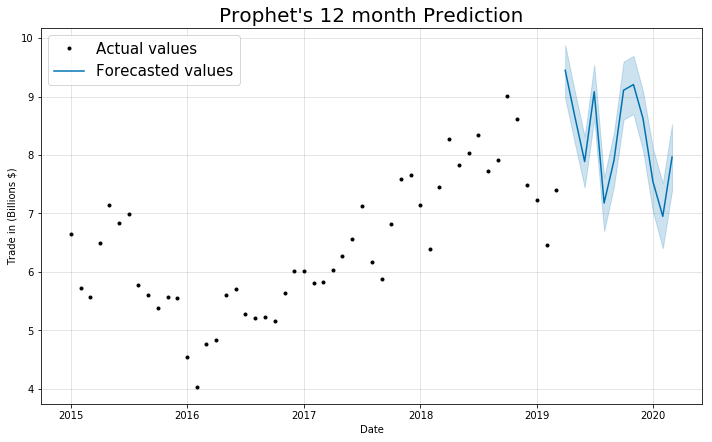

In [413]:
trade_prophet.plot(prediction, xlabel = 'Date', ylabel = 'Trade in (Billions $)')
plt.title("Prophet's 12 month Prediction",fontsize =20);
plt.gca().legend(("Actual values", "Forecasted values"),fontsize=15)

In [406]:
metric_df = trade_forecast.set_index('ds')[['yhat']].join(trade_test.set_index('ds').y).reset_index()

In [407]:
metric_df.tail()

,ds,yhat,y
58,2019-10-31,9.205944,NaN
59,2019-11-30,8.624783,NaN
60,2019-12-31,7.547717,NaN
61,2020-01-31,6.951209,NaN
62,2020-02-29,7.964356,NaN


In [408]:
metric_df.dropna(inplace=True)

In [409]:

metric_df.tail()

,ds,yhat,y
46,2018-11-01,8.278235,8.611642
47,2018-12-01,8.072484,7.483425
48,2019-01-01,7.621520,7.231464
49,2019-02-01,7.003448,6.456199
50,2019-03-01,7.537354,7.405555


In [410]:
r2_score(metric_df.y, metric_df.yhat)

0.9052877973103215

In [411]:
mean_squared_error(metric_df.y, metric_df.yhat)

0.11982428130989234